<h1> CSE351 HW1 </h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
#from google.colab import files
#uploaded = files.upload()
import csv

In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<h1> 1. </h1>
Examine the data, there may be some anomalies in the data, and you will have to clean the data
before you move forward to other tasks. Explain what you did to clean the data. (10 Points)

For house listings that have 0 reviews, the 'last_review' and 'reviews_per_month' are both NaN. We will not replace 'last_review' because replacing it with '0' may skew the results of the dates should we use the result. We will replace only the 'reviews_per_month' because it may be useful.

In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0);
#I honestly could not find many outliers/anomolies. There are listings that are well into the 1000+ but I believe they are genuine listings so I didn't want to remove them.
#df.dropna()
#df.reset_index(drop=True)

<h1> 2. </h1>
Examine how the prices of the Airbnb changes with the change in the neighborhood.

a. Find Top 5 and Bottom 5 neighborhood based on the price of the Airbnb in that neighborhood
(select only neighborhoods with more than 5 listings). (10 Points)

b. Analyze, the price variation between different neighborhood group, and plot these trends. (5
Points)


In [ ]:
#groupedByNeighorhood = df.groupby('neighborhood')['room_type'].count()
#val=df[df['neighbourhood_group']].index
#groupedByNeighbourhoodGroup = df[['neighbourhood_group','price']].loc[val]
#groupedByNeighbourhoodGroup.groupby('neighbourhood_group')['price'].count()
#print(df[1])
df.groupby('neighborhood_group')
#Incomplete :(
#PLease be kind with partial credit :D


KeyError: ignored

<h1> 3. </h1>
Select a set of the most interesting features. Do a pairwise Pearson correlation analysis on all pairs
of these variables. Show the result with a heat map and find out most positive and negative
correlations. (5 points)

The most positive correlations seem to be the 'number_of_reviews' and 'reviews_per_month' which makes sense since the number of reviews is literally in the formula of reviews per month. We can calculate how long the listing has been up using this information if we wanted, excluding those with 0 number of reviews. The second highest is 'calculated_host_listings_count' and 'availability' because they are the lightest purple/violet. I believe the calculated host listing count is the number of listings under one host_name. This makes sense because if a person has multiple listings, they likely have multiple houses dedicated to AirBNB which they can list all year as a business or form of profits.

The most negative correlations are those closer to black which I will not list because there are 6 near black. Since task 3 does not ask us to explain why, I will not explain my reasoning for the 6 listings close to black.

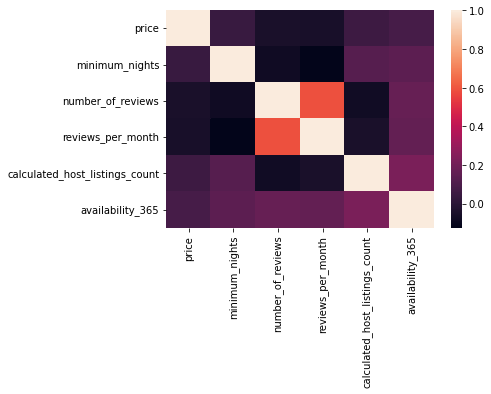

In [ ]:
#df.loc[:, ~df.columns.isin(['rebounds', 'assists'])] Example of how to exclude certain columns
#sns.heatmap(df.corr());
#sns.heatmap(df.loc[:, ~df.columns.isin(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'last_review'])]) #I have no idea why this line does not work? It is just all black for some reason.
#Actually the it goes from 0 to 10000 because we aren't doing a correlation coeffciient.
#A good idea would be to replace something like 'neighborhood' and 'room_type' with a number so we can also do correlation coefficient on this but no time.
#We are removing any data with strings or information that does not seem relevant.
#The data that is numeric that I am removing is id, host_id, latitude, longitude, and last_review (saved as string) because they do not seem to be very important
sns.heatmap(df.loc[:, ~df.columns.isin(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'last_review'])].corr())

<h1> 4. </h1>
The Latitude and Longitude of all the Airbnb listings are provided in the dataset.

a. Plot a scatter plot based on these coordinates, where the points represent the location of an
Airbnb, and the points are color coded based on the neighborhood group feature. (5 Points)

b. Now again, plot a scatter plot based on these coordinates, where the points represent the
location of an Airbnb, and the points are color coded based on the price of the particular Airbnb,
where price of the listing is less than 1000. Looking at the graph can you tell which
neighborhood group is the most expensive. (5 Points)

We see that the lower half of Manhattan is has the most frequent listings of houses with prices from 800-1000.

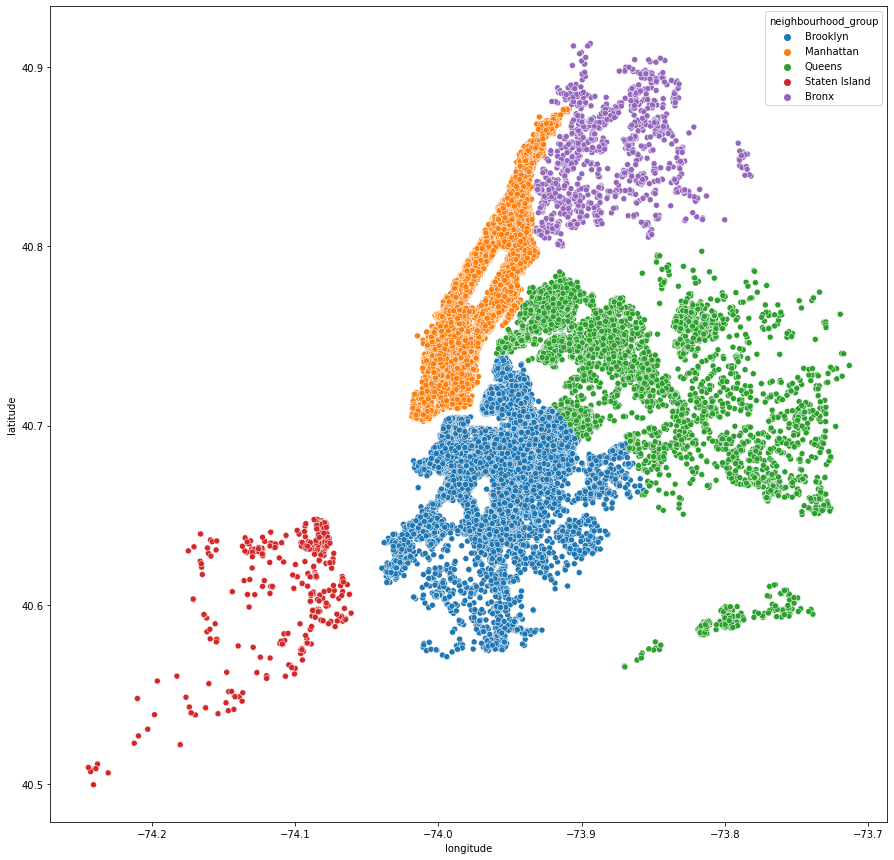

In [ ]:
#Set the size of the figure.
fig = plt.gcf()
fig.set_size_inches(15, 15)
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df)

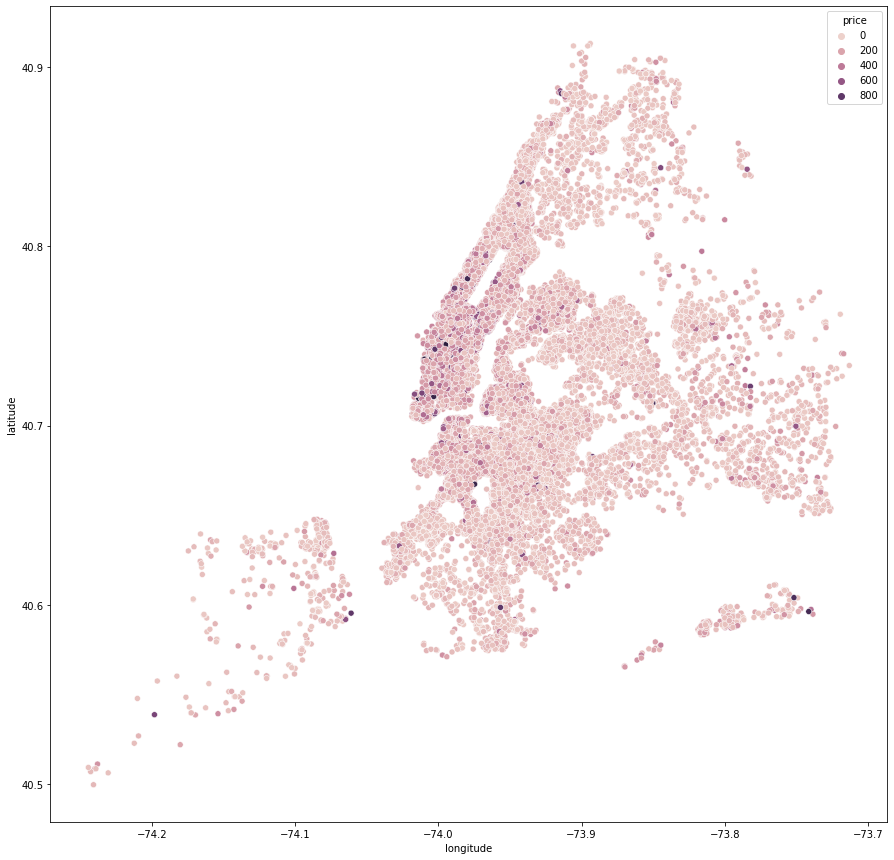

In [ ]:
#filtered = df[df['price'] < 1000]
#print(filtered) Printed this to make sure that we were really filtering out listings 1000 or more. It turns out that we were but there were only a few so you can't see visual difference.

#Filter out the rows with prices 1000 or above.
filteredOutOver1000s = df[df['price'] < 1000]

#Set the size of the figure.
fig = plt.gcf()
fig.set_size_inches(15, 15)
sns.scatterplot(x='longitude', y='latitude', hue='price', data=filteredOutOver1000s)

<h1> 5. </h1>
Word clouds are useful tool to explore the text data. Extract the words from the name of the Airbnb
and generate a word cloud. (5 Points)

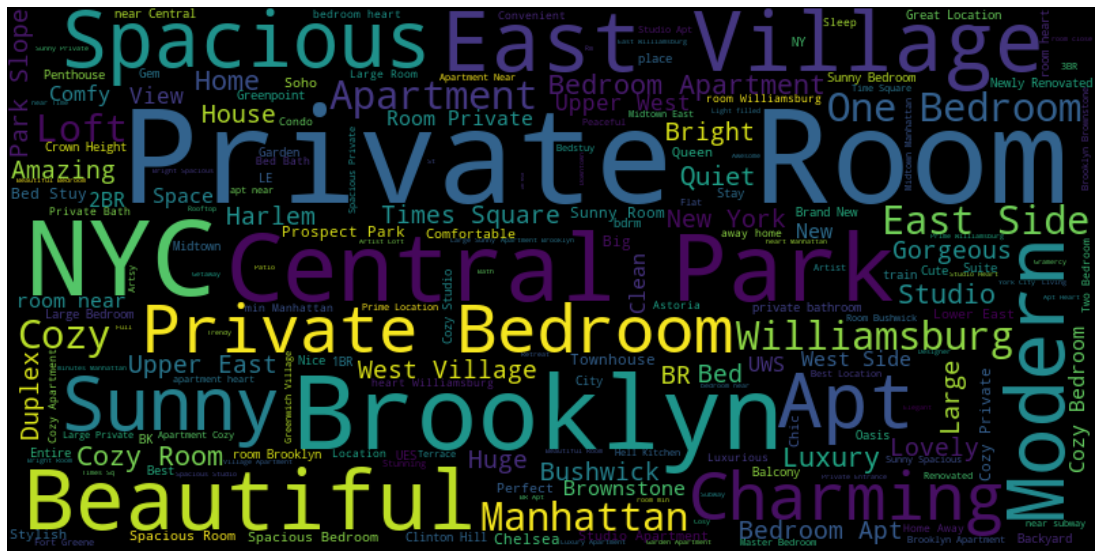

In [ ]:
#wordcloud = WordCloud().generate_from_frequencies(df['name'])
#plt.imshow(wordcloud)

#your_list = []
with open('AB_NYC_2019.csv', 'r', encoding='utf8') as f:
    reader = csv.reader(f)
    your_list = '\t'.join([i[1] for i in reader])

#your_list = df["name"].tolist()
#print(your_list)

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400).generate(your_list)

# Display the generated image:
# the matplotlib way:
#import matplotlib.pyplot as plt
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")

# lower max_font_size
#wordcloud = WordCloud(max_font_size=40).generate(your_list)
#wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure( figsize=(20,10) )

#plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h1> 6. </h1>
Find out which areas has the busiest (hosts with high number of listings) host? Are there any
reasons, why these hosts are the busiest, considers factors such as availability, price, review, etc.?
Bolster you reasoning with different plots and correlations. (10 Points)

In [ ]:
#Incomplete :(

<h1> 7. </h1>
Create two plots (at least one unique plot not used above) of your own using the dataset that you
think reveals something very interesting. Explain what it is, and anything else you learned. (10
Points)

From this we can see that most hosts that own multiple listings are focusing on listings in Manhattan.

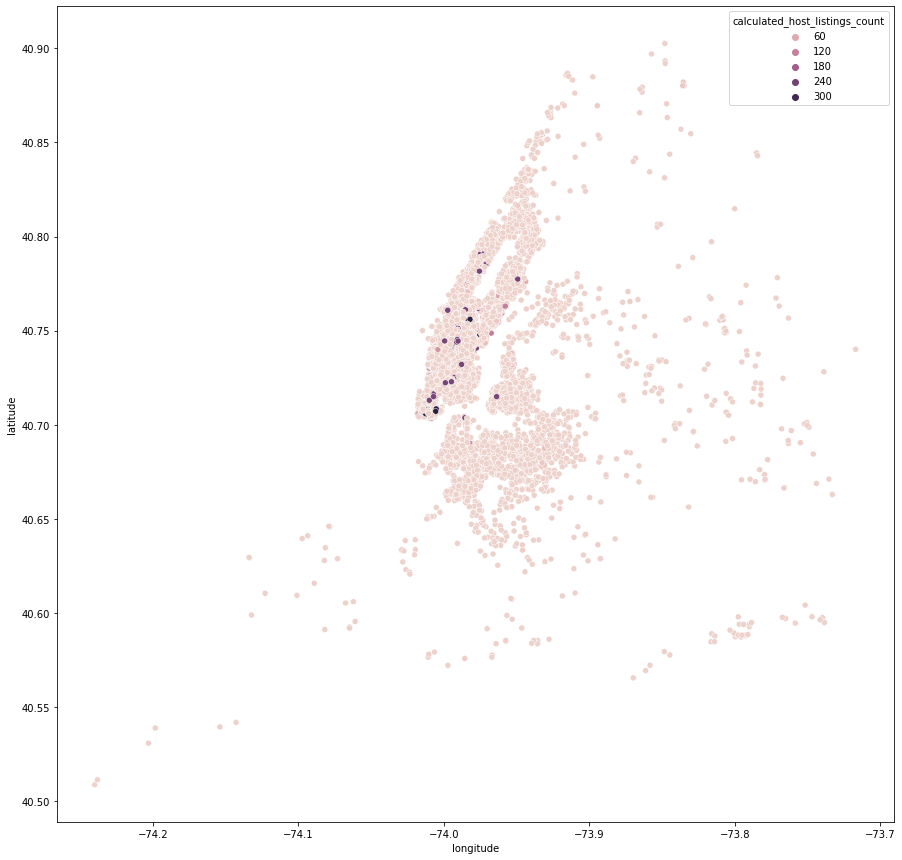

In [ ]:
#Plot 1
#Filter out the rows with prices 200 or less.
filteredOutUnder200s = df[df['price'] > 200]

#Set the size of the figure.
fig = plt.gcf()
fig.set_size_inches(15, 15)
sns.scatterplot(x='longitude', y='latitude', hue='calculated_host_listings_count', data=filteredOutUnder200s)
#From this we can see that most hosts that own multiple listings are focusing on listings in Manhattan.

In [ ]:
#Plot 2
#Incomplete :(

<h1> Additionals: </h1>
Visual Appeal and Layout - For all the tasks above, please include an explanation wherever asked
and make sure that your procedure is documented (suitable comments) as well as you can. Don’t
forget to label all plots and include legends wherever necessary as this is key to making good
visualizations! Ensure that the plots are visible enough by playing with size parameters. Be sure to
use appropriate color schemes wherever possible to maximize the ease of understandability.
Everything must be laid out in a python notebook(.ipynb). (5 Points)

Submission
1. This assignment must be done individually by every student. Your code will be checked thoroughly
to detect copying/plagiarism. Do your own work!
2. If you do not have much experience with Python and the associated tools, this homework will be a
substantial amount of work. Get started on it as early as possible!
3. Please use Piazza to ask any questions.
4. Submit everything through Blackboard. You will need to upload:
1. The Jupyter notebook all your work is in (.ipynb file)
2. Python file (export the notebook as .py)
3. PDF (export the notebook as a pdf file)
These files should be named with the following format, where the italicized parts should be replaced
with the corresponding values:
1. cse351_hw1_lastname_firstname_sbuid.ipynb
2. cse351_hw1_lastname_firstname_sbuid.py
3. cse351_hw1_lastname_firstname_sbuid.pdf